# Project 3: Part 3 Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
import datetime as dt
import numpy as np
import pickle
from tqdm import tqdm

%matplotlib inline

from sklearn import metrics

import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc

In [3]:
with open("users.pkl", 'rb') as picklefile: 
    users = pickle.load(picklefile)

In [4]:
users.US.value_counts()

1    62376
0    26532
Name: US, dtype: int64

In [5]:
# Separate majority and minority classes
users_majority = users[users.US==1]
users_minority = users[users.US==0]
 
# Upsample minority class
users_minority_upsampled = resample(users_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=62376,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
users_upsampled = pd.concat([users_majority, users_minority_upsampled])
 
# Display new class counts
users_upsampled.US.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    62376
0    62376
Name: US, dtype: int64

In [6]:
y = users_upsampled['US']
users = users_upsampled.drop('US', axis = 1)

In [7]:
users = users.drop('id',axis = 1)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(users, y, test_size=0.2,stratify = y)#, random_state = 1234)

In [9]:
#y = users['US']
#users = users.drop('US', axis = 1)

In [10]:
#users = users.drop('id',axis = 1)

In [11]:
#users.shape

In [12]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: US, dtype: uint8

In [13]:
#xtrain, xtest, ytrain, ytest = train_test_split(users.iloc[:,:], y, test_size=0.2,stratify = y)#, random_state = 1234)

In [14]:
xtrain.head()

,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_facebook,signup_method_google,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Tablet,first_device_type_Desktop (Other),...,langues_en,diff_account_to_first_active,diff_account_to_first_booking,age,total_sessions,total_sessions_on_mac,total_sessions_on_windows,total_sessions_on_iphone,total_sessions_on_android,no_age_entered
56779,1,0,0,0,0,0,1,0,0,0,...,1,0,4,27.000000,0.0,0.0,0.0,0.0,0.0,0
12991,0,0,0,0,0,0,1,0,0,0,...,0,0,1,36.924928,0.0,0.0,0.0,0.0,0.0,1
51281,1,0,0,0,0,0,1,0,0,0,...,1,0,7,28.000000,0.0,0.0,0.0,0.0,0.0,0
82964,1,0,0,0,0,0,1,0,0,0,...,1,0,3,24.000000,27.0,27.0,0.0,0.0,0.0,0
678,1,0,0,1,0,0,1,0,0,0,...,1,0,121,48.000000,0.0,0.0,0.0,0.0,0.0,0


## KNN

In [15]:
normalizer = preprocessing.Normalizer()
users_norm = normalizer.fit_transform(users)

In [16]:
xtrain_norm, xtest_norm, ytrain_norm, ytest_norm = train_test_split(users_norm, y, test_size=0.2,stratify = y)#, random_state = 1234)

In [17]:
k_range = list(range(1,31))
k_auc = []
for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain_norm, ytrain_norm)
    y_score = knn.predict_proba(xtest_norm)[:,1]
    fpr, tpr,_ = roc_curve(ytest_norm, y_score)
    roc_auc = auc(fpr, tpr)
    k_auc.append(roc_auc)
print(k_auc)

100%|██████████| 30/30 [17:34<00:00, 35.14s/it]

[0.7476222724384326, 0.74600164098636512, 0.71981489108386709, 0.69688761620708561, 0.67767321433505034, 0.66456343594531164, 0.65644014865254718, 0.64837516327942835, 0.64214369746225386, 0.63639793212587414, 0.63182941387745029, 0.62738999319575339, 0.62429891523990588, 0.62178259050965023, 0.62023597371080741, 0.61719655084455538, 0.61462732775586437, 0.6128343316964161, 0.61250900325819968, 0.60984660247073186, 0.60718716689550967, 0.60457377724348971, 0.60254461793095637, 0.60141746140565844, 0.59985695661923399, 0.59838636233672859, 0.59732508299702969, 0.59547699117375497, 0.59412805412042424, 0.59385215766576438]


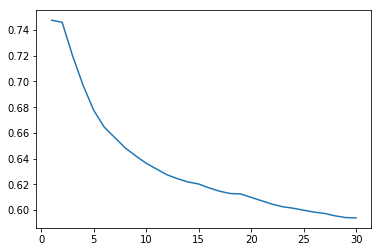

In [18]:
plt.plot(k_range, k_auc)
plt.savefig('knn_k_auc')

In [19]:
np.argmax(np.array(k_auc))

0

In [20]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(xtrain_norm, ytrain_norm)
y_pred = knn.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, knn.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, knn.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,knn.predict(xtest_norm)))

Accuracy: 0.583
             precision    recall  f1-score   support

          0       0.57      0.69      0.62     12476
          1       0.61      0.48      0.53     12475

avg / total       0.59      0.58      0.58     24951

[[8590 3886]
 [6516 5959]]


In [21]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(xtrain_norm, ytrain_norm)
y_pred = knn5.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, knn5.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, knn5.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,knn5.predict(xtest_norm)))

Accuracy: 0.629
             precision    recall  f1-score   support

          0       0.61      0.70      0.66     12476
          1       0.65      0.55      0.60     12475

avg / total       0.63      0.63      0.63     24951

[[8795 3681]
 [5575 6900]]


## SVMs

### Linear

In [ ]:
l_svm = SVC(kernel='linear')
l_svm.fit(xtrain_norm, ytrain_norm)
y_pred = l_svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,l_svm.predict(xtest_norm)))

### RBF

In [ ]:
rbf_svm = SVC(kernel='rbf', gamma = 0.001)
rbf_svm.fit(xtrain_norm, ytrain_norm)
y_pred = rbf_svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,rbf_svm.predict(xtest_norm)))

## Logistic Regression

In [ ]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, lr.predict(xtest)))
print(metrics.classification_report(ytest, lr.predict(xtest)))
print(metrics.confusion_matrix(ytest,lr.predict(xtest)))
# Needs work: print(cross_val_score(lr, xtest, ytest, cv=10, scoring='f1'))

## Random Forests

### Random Forests with Upsampling

In [ ]:
rf = RandomForestClassifier(n_estimators = 5)#class_weight = 'balanced')
rf.fit(xtrain_up, ytrain_up)
y_pred = rf.predict(xtest_up)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_up, rf.predict(xtest_up)))
print(metrics.classification_report(ytest_up, rf.predict(xtest_up)))
print(metrics.confusion_matrix(ytest_up,rf.predict(xtest_up)))

In [ ]:
n_range = list(range(10,100))
n_up_auc = []
for n in tqdm(n_range):
    rf = RandomForestClassifier(n_estimators = n)#class_weight = 'balanced')
    rf.fit(xtrain_up, ytrain_up)
    y_score = rf.predict_proba(xtest_up)[:,1]
    fpr, tpr,_ = roc_curve(ytest_up, y_score)
    roc_auc = auc(fpr, tpr)
    n_up_auc.append(roc_auc)
print(n_up_auc)

In [ ]:
plt.plot(n_range, n_up_auc)
plt.savefig('n_up_auc')

In [ ]:
np.argmax(np.array(n_up_auc))

In [ ]:
rf_64 = RandomForestClassifier(n_estimators = 64)#class_weight = 'balanced')
rf_64.fit(xtrain_up, ytrain_up)
y_pred = rf.predict(xtest_up)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_up, rf_64.predict(xtest_up)))
print(metrics.classification_report(ytest_up, rf_64.predict(xtest_up)))
print(metrics.confusion_matrix(ytest_up,rf_64.predict(xtest_up)))

### Random Forests, no upsampling

In [ ]:
rf = RandomForestClassifier(n_estimators = 5)#class_weight = 'balanced')
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf.predict(xtest)))
print(metrics.classification_report(ytest, rf.predict(xtest)))
print(metrics.confusion_matrix(ytest,rf.predict(xtest)))

In [ ]:
n_range = list(range(10,100))
n_auc = []
for n in tqdm(n_range):
    rf = RandomForestClassifier(n_estimators = n)#class_weight = 'balanced')
    rf.fit(xtrain, ytrain)
    y_score = rf.predict_proba(xtest)[:,1]
    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    n_auc.append(roc_auc)
print(n_auc)

In [ ]:
plt.plot(n_range, n_auc)
plt.savefig('rf_n_auc')

In [ ]:
np.argmax(np.array(n_auc))

In [ ]:
rf_plain = RandomForestClassifier(n_estimators = 48, class_weight = 'balanced')
rf_plain.fit(xtrain, ytrain)
y_pred = rf_plain.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf_plain.predict(xtest)))
print(metrics.classification_report(ytest, rf_plain.predict(xtest)))
print(metrics.confusion_matrix(ytest,rf_plain.predict(xtest)))

In [ ]:
features = pd.DataFrame()
features['importances'] = rf.feature_importances_
features['features'] = users.columns
features.sort_values('importances',ascending = False)

## Naive Bayes

### Gaussian

In [ ]:
nb_g = naive_bayes.GaussianNB()
nb_g.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_g.predict(xtest)))
print(metrics.classification_report(ytest, nb_g.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_g.predict(xtest)))

### Bernoulli

In [ ]:
nb_b = naive_bayes.BernoulliNB()
nb_b.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_b.predict(xtest)))
print(metrics.classification_report(ytest, nb_b.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_b.predict(xtest)))

### Multinomial

In [ ]:
nb_m = naive_bayes.MultinomialNB()
nb_m.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_m.predict(xtest)))
print(metrics.classification_report(ytest, nb_m.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_m.predict(xtest)))

In [ ]:
users

In [ ]:
# What about ROC ? 

from sklearn.metrics import roc_curve, auc

xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(users, y, test_size=0.2, stratify = y, random_state=1234)

lr_score=lr.predict_proba(xtest)[:,1]
nb_m_score = nb_m.predict_proba(xtest)[:,1]
nb_b_score = nb_b.predict_proba(xtest)[:,1]
rf_64_score = rf_64.predict_proba(xtest_up)[:,1]
rf_plain_score = rf_plain.predict_proba(xtest)[:,1]
knn_score = knn.predict_proba(xtest)[:,1]
knn5_score = knn5.predict_proba(xtest)[:,1]
#l_svm_score = l_svm.predict_proba(xtest)[:,1]

lr_fpr, lr_tpr,_ = roc_curve(ytest, lr_score)
nb_m_fpr, nb_m_tpr,_ = roc_curve(ytest, nb_m_score)
nb_b_fpr, nb_b_tpr,_ = roc_curve(ytest, nb_b_score)
rf_64_fpr, rf_64_tpr,_ = roc_curve(ytest_up, rf_64_score)
rf_plain_fpr, rf_plain_tpr,_ = roc_curve(ytest, rf_plain_score)
knn_fpr, knn_tpr,_ = roc_curve(ytest, knn_score)
knn5_fpr, knn5_tpr,_ = roc_curve(ytest, knn5_score)
#l_svm_fpr, l_svm_tpr,_ = roc_curve(ytest, l_svm_score)
#roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1])

plt.plot(lr_fpr,lr_tpr, label = 'LogisticRegression')
plt.plot(nb_m_fpr,nb_m_tpr, label = 'NaiveBayes - Multinomial')
plt.plot(nb_b_fpr,nb_b_tpr, label = 'NaiveBayes - Bernoulli')
plt.plot(rf_64_fpr,rf_64_tpr, label = 'RandomForrests n=64, upsampled')
plt.plot(rf_plain_fpr,rf_plain_tpr, label = 'RandomForrests n=48')
plt.plot(knn_fpr,knn_tpr, label = 'KNN K = 16')
plt.plot(knn5_fpr,knn5_tpr, label = 'KNN K=5')
#plt.plot(l_svm_fpr,l_svm_tpr, label = 'SVM-Linear')

plt.legend()
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.savefig('RocCurve')